---------------------------
## Segmentação de Imagens de Câncer de Mama

Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A **Segmentação de Imagem** envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [1]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento 

In [2]:
img_G = mpimg.imread('./mdb001.pgm')
img_D = mpimg.imread('./mdb003.pgm')
img_F = mpimg.imread('./mdb005.pgm')

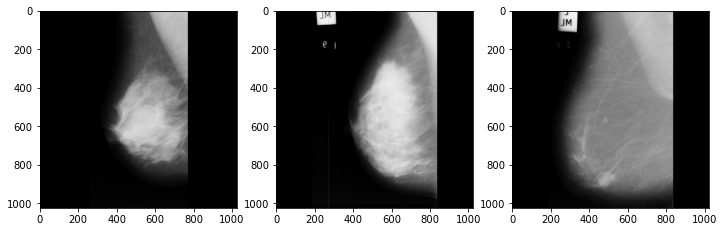

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 10))

im1= ax[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2= ax[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3= ax[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)

plt.show()

In [9]:
print(img_F.shape)
print(img_F.reshape((-1,1)).shape)

(1024, 1024)
(1048576, 1)


In [23]:
# Kmeans como filtro de segmentação de imagens

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1, 1))
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_image = segmented_data.reshape((img.shape))

    return segmented_image

In [29]:
k = 4

img_G_segmentada = filtro_kmeans(img_G, k)
img_D_segmentada = filtro_kmeans(img_D, k)
img_F_segmentada = filtro_kmeans(img_F, k)

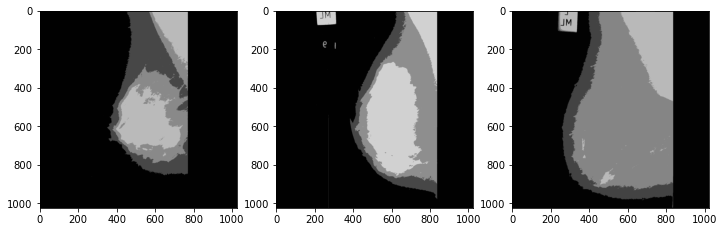

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 10))

im1= ax[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2= ax[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3= ax[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)

plt.show()